In [ ]:
'''
Importing required libraries
'''

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
sns.set()

In [2]:
#if working from google drive we need to mount it(i.e., reading data from google drive)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# setting working directory
%cd /content/drive/MyDrive/FlightFarePredictionProject

/content/drive/MyDrive/FlightFarePredictionProject


In [ ]:
'''
Loading data....
'''

In [4]:
dataset=pd.read_excel("a1_FlightFare_Dataset.xlsx")

In [5]:
pd.set_option('display.max_columns',None) #to display the whole dataset according to the colab width

In [6]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10001 non-null  object 
 1   Date_of_Journey  10001 non-null  object 
 2   Source           10001 non-null  object 
 3   Destination      10001 non-null  object 
 4   Route            10000 non-null  object 
 5   Dep_Time         10001 non-null  object 
 6   Arrival_Time     10001 non-null  object 
 7   Duration         10001 non-null  object 
 8   Total_Stops      10000 non-null  object 
 9   Additional_Info  10001 non-null  object 
 10  Price            10001 non-null  float64
dtypes: float64(1), object(10)
memory usage: 859.6+ KB


In [ ]:
'''
Data cleaning...
check null values
check dataset.info() - to know the datatype of each column. If you want to change the datatype then use data[" "]=data[" "].astype()
We have two types of data - 
    1.) Object data
    2.) Categorical data -
        1.) Norminal data
        2.) Cardinal data
'''

In [8]:
dataset.isnull().sum() # checking if there are any null values in our data set

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
dataset.dropna(axis=0,inplace=True) # dropping the null value rows from our dataset

In [10]:
dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10000 non-null  object 
 1   Date_of_Journey  10000 non-null  object 
 2   Source           10000 non-null  object 
 3   Destination      10000 non-null  object 
 4   Route            10000 non-null  object 
 5   Dep_Time         10000 non-null  object 
 6   Arrival_Time     10000 non-null  object 
 7   Duration         10000 non-null  object 
 8   Total_Stops      10000 non-null  object 
 9   Additional_Info  10000 non-null  object 
 10  Price            10000 non-null  float64
dtypes: float64(1), object(10)
memory usage: 937.5+ KB


In [ ]:
'''
Feature Engineering
'''

In [ ]:
'''
Handling object datatypes :- Our computer can't able to understand the object datatypes. So we need to convert them into numeric values.
'''

In [ ]:
'''
We have Date_of_Journey, Dep_Time, Arrival_Time and Duration object datatypes. To convert them into numeric features, we use pandas to_datetime method.
  --> .dt.day - extract day from date
  --> .dt.month - extract month from date
  --> We are not extracting year because our whole dataset is based on the year 2019.
'''

In [12]:
#extracting date from Date_of_Journey and creating a new column in our dataset
dataset['Journey_date']=pd.to_datetime(dataset.Date_of_Journey,format="%d/%m/%Y").dt.day 

In [13]:
#extracting month from Date_of_Journey and creating a new column in our dataset
dataset['Journey_month']=pd.to_datetime(dataset.Date_of_Journey,format="%d/%m/%Y").dt.month

In [14]:
#since date and month are derived, we don't have any use of Date_of_Journey column so we can remove that column
dataset.drop(["Date_of_Journey"],axis=1,inplace=True)

In [15]:
dataset.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3


In [16]:
dataset["Dep_hour"]=pd.to_datetime(dataset.Dep_Time).dt.hour

In [17]:
dataset["Dep_min"]=pd.to_datetime(dataset.Dep_Time).dt.minute

In [18]:
dataset.drop(["Dep_Time"],axis=1,inplace=True)

In [19]:
dataset.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662.0,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218.0,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302.0,1,3,16,50


In [20]:
dataset["Arrival_hour"]=pd.to_datetime(dataset.Arrival_Time).dt.hour

In [21]:
dataset["Arrival_min"]=pd.to_datetime(dataset.Arrival_Time).dt.minute

In [22]:
dataset.drop(["Arrival_Time"],axis=1,inplace=True)

In [23]:
dataset.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,16,50,21,35


In [24]:
duration=list(dataset["Duration"]) #converting Duration column into a list
for i in range(len(duration)):
  '''
  if Duration is not in the format of (22h 15m) then we need to convert them i.e., if there are any cells having only 19h and 55m we need to convert them into
  19h 0m and 0h 55m. So that we can differentiate the duration hour and duration minute.
  '''
  if len(duration[i].split())!=2: 
    if "h" in duration[i]:
      # strip method removes the extra white spaces
      duration[i]=duration[i].strip()+" 0m"
    else:
      duration[i]="0h "+duration[i].strip()

In [25]:
duration_hours=[]
duration_min=[]

In [26]:
for i in range(len(duration)):
  duration_hours.append(int(duration[i].split(sep="h")[0]))
  duration_min.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [27]:
dataset["Duration_hour"]=duration_hours
dataset["Duration_min"]=duration_min

In [28]:
dataset.drop(["Duration"],axis=1,inplace=True)

In [29]:
dataset.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882.0,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218.0,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302.0,1,3,16,50,21,35,4,45


In [ ]:
# Feature engineering on Airline

In [30]:
dataset["Airline"].value_counts()

Jet Airways                          3598
IndiGo                               1927
Air India                            1633
Multiple carriers                    1129
SpiceJet                              769
Vistara                               447
Air Asia                              296
GoAir                                 179
Multiple carriers Premium economy      13
Jet Airways Business                    5
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [31]:
Airline=dataset[["Airline"]]  #creating a new dataframe
Current_Airline_List=Airline["Airline"]
New_Airline_List=[]
for i in Current_Airline_List:
  if i in ['Jet Airways','IndiGo','Air India','Multiple carriers','SpiceJet','Vistara','Air Asia','GoAir']:
    New_Airline_List.append(i)
  else:
    New_Airline_List.append("Other")

In [32]:
Airline["Airline"]=pd.DataFrame(New_Airline_List)

<ipython-input-32-3bf1029e4af5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline["Airline"]=pd.DataFrame(New_Airline_List)


In [33]:
Airline["Airline"].value_counts()

Jet Airways          3598
IndiGo               1927
Air India            1632
Multiple carriers    1129
SpiceJet              769
Vistara               447
Air Asia              296
GoAir                 179
Other                  22
Name: Airline, dtype: int64

In [34]:
Airline=pd.get_dummies(Airline,drop_first=True)  #categorical data into dummy variables

In [35]:
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara
0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [36]:
dataset["Source"].value_counts()

Delhi       4257
Kolkata     2678
Banglore    2058
Mumbai       647
Chennai      360
Name: Source, dtype: int64

In [ ]:
# Feature engineering on Source column

In [37]:
Source=dataset[["Source"]]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [38]:
dataset["Destination"].value_counts()

Cochin       4257
Banglore     2678
Delhi        1191
New Delhi     867
Hyderabad     647
Kolkata       360
Name: Destination, dtype: int64

In [39]:
Destination=dataset[["Destination"]]
Curr_Dest_List=Destination["Destination"]
New_Dest_List=[]
for i in Curr_Dest_List:
  if i in ["New Delhi"]:
    New_Dest_List.append("Delhi")
  else:
    New_Dest_List.append(i)

In [40]:
Destination["Destination"]=pd.DataFrame(New_Dest_List)

<ipython-input-40-fbf0fb873d18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Destination["Destination"]=pd.DataFrame(New_Dest_List)


In [41]:
Destination["Destination"].value_counts()

Cochin       4256
Banglore     2678
Delhi        2058
Hyderabad     647
Kolkata       360
Name: Destination, dtype: int64

In [42]:
Destination=pd.get_dummies(Destination,drop_first=True)

In [43]:
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [ ]:
'''
Additional info mostly contains no-info. So it is not much important or required to calculate the target variable. So, we can drop it.
'''

In [44]:
dataset.drop(["Additional_Info"],axis=1,inplace=True)

In [ ]:
'''
Route and Total stops are both related to each other. So, we don't require Route column too.
'''

In [45]:
dataset.drop(["Route"],axis=1,inplace=True)

In [46]:
dataset.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897.0,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662.0,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882.0,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218.0,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302.0,1,3,16,50,21,35,4,45


In [47]:
dataset["Total_Stops"].value_counts()

1 stop      5281
non-stop    3259
2 stops     1415
3 stops       44
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
'''
Since Total_Stops is ordinal data. We perform label encoding on that column
'''

In [48]:
dataset.replace(
    {
        'non-stop':0,
        '1 stop':1,
        '2 stops':2,
        '3 stops':3,
        '4 stops':4
    }, inplace=True
)

In [49]:
dataset.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897.0,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662.0,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882.0,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218.0,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302.0,1,3,16,50,21,35,4,45


In [ ]:
'''
Now we create a new dataframe i.e, train_data+Original data and drop the unnecessary columns from the newly created dataframe
'''

In [50]:
data_train=pd.concat([dataset,Airline,Destination,Source],axis=1)

In [51]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,IndiGo,Banglore,New Delhi,0,3897.0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,2,7662.0,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Jet Airways,Delhi,Cochin,2,13882.0,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,1,6218.0,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,IndiGo,Banglore,New Delhi,1,13302.0,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [52]:
data_train.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [53]:
data_train.head()

,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,3897.0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,7662.0,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,13882.0,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
3,1,6218.0,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,13302.0,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [54]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10000
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Total_Stops                10000 non-null  int64  
 1   Price                      10000 non-null  float64
 2   Journey_date               10000 non-null  int64  
 3   Journey_month              10000 non-null  int64  
 4   Dep_hour                   10000 non-null  int64  
 5   Dep_min                    10000 non-null  int64  
 6   Arrival_hour               10000 non-null  int64  
 7   Arrival_min                10000 non-null  int64  
 8   Duration_hour              10000 non-null  int64  
 9   Duration_min               10000 non-null  int64  
 10  Airline_Air India          10000 non-null  uint8  
 11  Airline_GoAir              10000 non-null  uint8  
 12  Airline_IndiGo             10000 non-null  uint8  
 13  Airline_Jet Airways        10000 non-null  uin

In [55]:
data_train.shape

(10000, 26)

In [ ]:
'''
Feature selection using sklearn to check relative importance and multi-collinearity
1.) Feature Importance
2.) VIF multicollinearity
'''

In [57]:
X=data_train.loc[:, ['Total_Stops','Journey_date','Journey_month','Dep_hour','Dep_min','Arrival_hour','Arrival_min','Duration_hour','Duration_min','Airline_Air India','Airline_GoAir','Airline_IndiGo','Airline_Jet Airways','Airline_Multiple carriers','Airline_Other','Airline_SpiceJet','Airline_Vistara','Source_Chennai','Source_Delhi','Source_Kolkata','Source_Mumbai','Destination_Cochin','Destination_Delhi','Destination_Hyderabad','Destination_Kolkata']]

In [58]:
Y=data_train.iloc[:,1]

In [59]:
print(X.shape,Y.shape)

(10000, 25) (10000,)


In [ ]:
#feature importance
#important feature using ExtratTreesRegressor

In [60]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [61]:
print(model.feature_importances_)

[0.23477428 0.14183471 0.06506108 0.02834427 0.02622542 0.03368064
 0.02390328 0.15288412 0.02058073 0.00771361 0.00141373 0.01262694
 0.1110262  0.01696086 0.02851737 0.00420092 0.00333755 0.00115856
 0.02587545 0.00946957 0.01295494 0.00774764 0.02376677 0.00403947
 0.00190191]


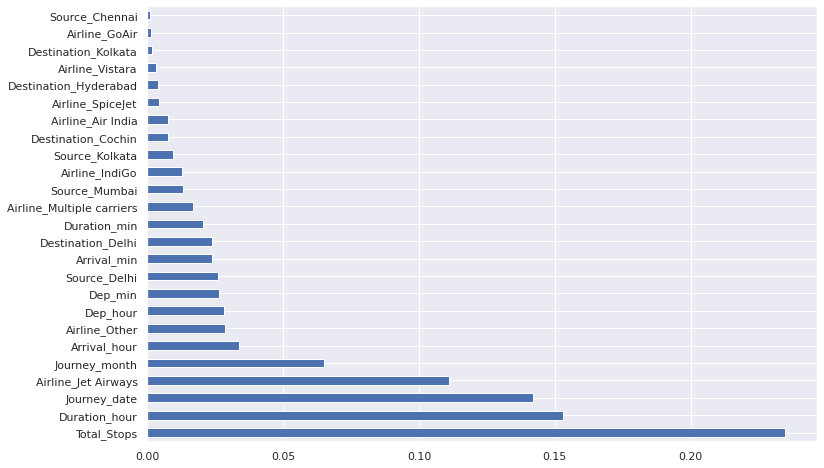

In [62]:
plt.figure(figsize=(12,8))
feature_importances=pd.Series(model.feature_importances_,index=X.columns)
feature_importances.nlargest(25).plot(kind='barh')
plt.show()

In [ ]:
'''
VIF- multicollinearity
'''

'\nVIF- multicollinearity\n'

In [63]:
#check for multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(z):
  vif=pd.DataFrame()
  vif["variables"]=z.columns
  vif["VIF"]=[variance_inflation_factor(z.values,i) for i in range(z.shape[1])]
  return vif

In [64]:
cal_vif(X)

,variables,VIF
0,Total_Stops,7.533035
1,Journey_date,3.511805
2,Journey_month,16.470796
3,Dep_hour,5.790951
4,Dep_min,2.804206
5,Arrival_hour,4.923106
6,Arrival_min,3.455823
7,Duration_hour,6.183394
8,Duration_min,4.106901
9,Airline_Air India,5.381726


In [65]:
X=data_train.loc[:, ['Total_Stops','Journey_date','Journey_month','Dep_hour','Dep_min','Arrival_hour','Arrival_min','Duration_hour','Duration_min','Airline_Air India','Airline_GoAir','Airline_IndiGo','Airline_Jet Airways','Airline_Multiple carriers','Airline_Other','Airline_SpiceJet','Airline_Vistara','Source_Chennai','Source_Kolkata','Source_Mumbai','Destination_Cochin','Destination_Delhi','Destination_Hyderabad','Destination_Kolkata']]

In [66]:
X.head()

,Total_Stops,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
'''
Fit-Model
'''

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [68]:
#model training
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,Y_train)

RandomForestRegressor()

In [69]:
#model performance
print("Model performance on training set is: ", round(model.score(X_train,Y_train)*100,2))
print("Model performance on testing set is: ", round(model.score(X_test,Y_test)*100,2))

Model performance on training set is:  95.44
Model performance on testing set is:  82.53


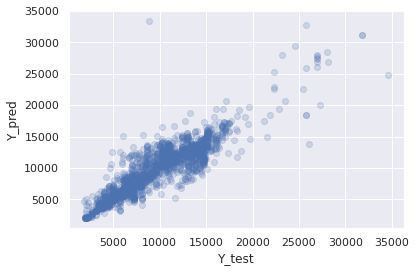

In [70]:
#plot performance graph
Y_pred=model.predict(X_test)
plt.scatter(Y_test,Y_pred,alpha=0.2)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.show()

In [71]:
#model errrors
print("Mean absolute error: ",metrics.mean_absolute_error(Y_test,Y_pred))
print("Mean squared error: ",metrics.mean_squared_error(Y_test,Y_pred))
print("Root mean squared error: ",np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

Mean absolute error:  1181.8485607238733
Mean squared error:  3469890.522701579
Root mean squared error:  1862.7642155414032


In [72]:
# Normalized root mean squared error
print("Normalized root mean squared error: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))/(max(Y_test)-min(Y_test)),2))

Normalized root mean squared error:  0.06


In [73]:
print("Max_value: ",max(Y))
print("Min_value: ",min(Y))

Max_value:  79512.0
Min_value:  1759.0


In [74]:
import pickle

In [75]:
with open('flight_rf.pkl','wb') as f:
  pickle.dump(model,f)

In [76]:
with open('flight_rf.pkl','rb') as f:
  rf_model=pickle.load(f)

In [77]:
unseen_dataset=pd.read_excel("a2_Unseen_Dataset.xlsx")

In [78]:
unseen_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,27/05/2019,Delhi,Cochin,DEL → BOM → COK,07:05,19:00,11h 55m,1 stop,In-flight meal not included,12898.0
1,IndiGo,6/03/2019,Delhi,Cochin,DEL → MAA → COK,02:05,07:25,5h 20m,1 stop,No info,10851.0
2,Air India,21/03/2019,Delhi,Cochin,DEL → BLR → COK,09:45,23:00,13h 15m,1 stop,No info,5704.0
3,Vistara,18/03/2019,Banglore,New Delhi,BLR → DEL,21:10,00:05 16 Mar,2h 55m,non-stop,No info,11598.0
4,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,08:30,19:15,10h 45m,1 stop,No info,9149.0


In [ ]:
'''
Perform feature engineering on unseen dataset
'''

In [ ]:
# feature engineering on object datatype

In [ ]:
#on Date_of_Journey

In [79]:
unseen_dataset["Journey_date"]=pd.to_datetime(unseen_dataset.Date_of_Journey,format="%d/%m/%Y").dt.day

In [80]:
unseen_dataset["Journey_month"]=pd.to_datetime(unseen_dataset.Date_of_Journey).dt.month

In [81]:
unseen_dataset.drop(["Date_of_Journey"],axis=1,inplace=True)

In [82]:
unseen_dataset.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,07:05,19:00,11h 55m,1 stop,In-flight meal not included,12898.0,27,5
1,IndiGo,Delhi,Cochin,DEL → MAA → COK,02:05,07:25,5h 20m,1 stop,No info,10851.0,6,6
2,Air India,Delhi,Cochin,DEL → BLR → COK,09:45,23:00,13h 15m,1 stop,No info,5704.0,21,3
3,Vistara,Banglore,New Delhi,BLR → DEL,21:10,00:05 16 Mar,2h 55m,non-stop,No info,11598.0,18,3
4,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:30,19:15,10h 45m,1 stop,No info,9149.0,27,5


In [ ]:
#on Dep_Time

In [83]:
unseen_dataset["Dep_hour"]=pd.to_datetime(unseen_dataset.Dep_Time).dt.hour

In [84]:
unseen_dataset["Dep_min"]=pd.to_datetime(unseen_dataset.Dep_Time).dt.minute

In [85]:
unseen_dataset.drop(["Dep_Time"],axis=1,inplace=True)

In [ ]:
#on Arrival_Time

In [86]:
unseen_dataset["Arrival_hour"]=pd.to_datetime(unseen_dataset.Arrival_Time).dt.hour

In [87]:
unseen_dataset["Arrival_min"]=pd.to_datetime(unseen_dataset.Arrival_Time).dt.minute

In [88]:
unseen_dataset.drop(["Arrival_Time"],axis=1,inplace=True)

In [89]:
unseen_dataset.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,11h 55m,1 stop,In-flight meal not included,12898.0,27,5,7,5,19,0
1,IndiGo,Delhi,Cochin,DEL → MAA → COK,5h 20m,1 stop,No info,10851.0,6,6,2,5,7,25
2,Air India,Delhi,Cochin,DEL → BLR → COK,13h 15m,1 stop,No info,5704.0,21,3,9,45,23,0
3,Vistara,Banglore,New Delhi,BLR → DEL,2h 55m,non-stop,No info,11598.0,18,3,21,10,0,5
4,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,10h 45m,1 stop,No info,9149.0,27,5,8,30,19,15


In [90]:
duration=list(unseen_dataset["Duration"])
for i in range(len(duration)):
  if len(duration[i].split())!=2:
    if "h" in duration[i]:
      duration[i]=duration[i].strip()+" 0m"
    else:
      duration[i]="0h "+duration[i].strip()

In [91]:
duration_hour=[]
duration_min=[]

In [92]:
for i in range(len(duration)):
  duration_hour.append(int(duration[i].split(sep="h")[0]))
  duration_min.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [93]:
unseen_dataset["Duration_hour"]=duration_hour

In [94]:
unseen_dataset["Duration_min"]=duration_min

In [95]:
unseen_dataset.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,11h 55m,1 stop,In-flight meal not included,12898.0,27,5,7,5,19,0,11,55
1,IndiGo,Delhi,Cochin,DEL → MAA → COK,5h 20m,1 stop,No info,10851.0,6,6,2,5,7,25,5,20
2,Air India,Delhi,Cochin,DEL → BLR → COK,13h 15m,1 stop,No info,5704.0,21,3,9,45,23,0,13,15
3,Vistara,Banglore,New Delhi,BLR → DEL,2h 55m,non-stop,No info,11598.0,18,3,21,10,0,5,2,55
4,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,10h 45m,1 stop,No info,9149.0,27,5,8,30,19,15,10,45


In [ ]:
# feature engineering on categorical datatype

In [ ]:
#on Airline

In [96]:
Airline=unseen_dataset[["Airline"]]

In [97]:
Airline["Airline"].value_counts()

Jet Airways             251
IndiGo                  126
Air India               118
Multiple carriers        67
SpiceJet                 49
Vistara                  32
Air Asia                 23
GoAir                    15
Jet Airways Business      1
Name: Airline, dtype: int64

In [98]:
Curr_airline_list=Airline["Airline"]
New_airline_list=[]
for i in Curr_airline_list:
  if i in['Jet Airways','IndiGo','Air India','Multiple carriers','SpiceJet','Vistara','Air Asia','GoAir']:
    New_airline_list.append(i)
  else:
    New_airline_list.append("Other")

In [99]:
Airline["Airline"]=pd.DataFrame(New_airline_list)

<ipython-input-99-077ce0fca04d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline["Airline"]=pd.DataFrame(New_airline_list)


In [100]:
Airline=pd.get_dummies(Airline,drop_first=True)

In [101]:
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara
0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0


In [102]:
Source=unseen_dataset[["Source"]]
Source=pd.get_dummies(Source,drop_first=True)

In [103]:
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,0
4,0,1,0,0


In [104]:
Destination=unseen_dataset[["Destination"]]

In [105]:
Curr_dest_list=Destination["Destination"]
New_dest_list=[]
for i in Curr_dest_list:
  if i=="New Delhi":
    New_dest_list.append("Delhi")
  else:
    New_dest_list.append(i)

In [106]:
Destination["Destination"]=pd.DataFrame(New_dest_list)

<ipython-input-106-9a799d23b249>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Destination["Destination"]=pd.DataFrame(New_dest_list)


In [107]:
Destination=pd.get_dummies(Destination,drop_first=True)

In [108]:
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,1,0,0
4,1,0,0,0


In [109]:
unseen_dataset.drop(["Additional_Info","Route"],axis=1,inplace=True)

In [110]:
unseen_dataset["Total_Stops"].value_counts()

1 stop      344
non-stop    232
2 stops     105
3 stops       1
Name: Total_Stops, dtype: int64

In [111]:
unseen_dataset.replace({
    'non-stop':0,
    '1 stop':1,
    '2 stops':2,
    '3 stops':3
},inplace=True)

In [112]:
unseen_dataset.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,Jet Airways,Delhi,Cochin,11h 55m,1,12898.0,27,5,7,5,19,0,11,55
1,IndiGo,Delhi,Cochin,5h 20m,1,10851.0,6,6,2,5,7,25,5,20
2,Air India,Delhi,Cochin,13h 15m,1,5704.0,21,3,9,45,23,0,13,15
3,Vistara,Banglore,New Delhi,2h 55m,0,11598.0,18,3,21,10,0,5,2,55
4,Multiple carriers,Delhi,Cochin,10h 45m,1,9149.0,27,5,8,30,19,15,10,45


In [113]:
data_test=pd.concat([unseen_dataset,Airline,Source,Destination],axis=1)

In [114]:
data_test.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [115]:
data_test.head()

,Duration,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,11h 55m,1,12898.0,27,5,7,5,19,0,11,55,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,5h 20m,1,10851.0,6,6,2,5,7,25,5,20,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
2,13h 15m,1,5704.0,21,3,9,45,23,0,13,15,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,2h 55m,0,11598.0,18,3,21,10,0,5,2,55,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,10h 45m,1,9149.0,27,5,8,30,19,15,10,45,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0


In [116]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Duration                   682 non-null    object 
 1   Total_Stops                682 non-null    int64  
 2   Price                      682 non-null    float64
 3   Journey_date               682 non-null    int64  
 4   Journey_month              682 non-null    int64  
 5   Dep_hour                   682 non-null    int64  
 6   Dep_min                    682 non-null    int64  
 7   Arrival_hour               682 non-null    int64  
 8   Arrival_min                682 non-null    int64  
 9   Duration_hour              682 non-null    int64  
 10  Duration_min               682 non-null    int64  
 11  Airline_Air India          682 non-null    uint8  
 12  Airline_GoAir              682 non-null    uint8  
 13  Airline_IndiGo             682 non-null    uint8  

In [117]:
data_test.drop(["Duration"],axis=1,inplace=True)

In [118]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Total_Stops                682 non-null    int64  
 1   Price                      682 non-null    float64
 2   Journey_date               682 non-null    int64  
 3   Journey_month              682 non-null    int64  
 4   Dep_hour                   682 non-null    int64  
 5   Dep_min                    682 non-null    int64  
 6   Arrival_hour               682 non-null    int64  
 7   Arrival_min                682 non-null    int64  
 8   Duration_hour              682 non-null    int64  
 9   Duration_min               682 non-null    int64  
 10  Airline_Air India          682 non-null    uint8  
 11  Airline_GoAir              682 non-null    uint8  
 12  Airline_IndiGo             682 non-null    uint8  
 13  Airline_Jet Airways        682 non-null    uint8  

In [119]:
data_test.head()

,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,1,12898.0,27,5,7,5,19,0,11,55,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,1,10851.0,6,6,2,5,7,25,5,20,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
2,1,5704.0,21,3,9,45,23,0,13,15,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,0,11598.0,18,3,21,10,0,5,2,55,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1,9149.0,27,5,8,30,19,15,10,45,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0


In [120]:
X_unseen=data_test.loc[:,['Total_Stops','Journey_date','Journey_month','Dep_hour','Dep_min','Arrival_hour','Arrival_min','Duration_hour','Duration_min','Airline_Air India','Airline_GoAir','Airline_IndiGo','Airline_Jet Airways','Airline_Multiple carriers','Airline_Other','Airline_SpiceJet','Airline_Vistara','Source_Chennai','Source_Kolkata','Source_Mumbai','Destination_Cochin','Destination_Delhi','Destination_Hyderabad','Destination_Kolkata']]

In [121]:
Y_unseen=data_test.iloc[:,1]

In [122]:
Y_pred=rf_model.predict(X_unseen)

In [123]:
print("Normalized RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_unseen,Y_pred))/(max(Y_unseen)-min(Y_unseen)),2))

Normalized RMSE:  0.07


In [124]:
print("Max value: ",max(Y_unseen))
print("Min value: ",min(Y_unseen))

Max value:  57209.0
Min value:  1759.0


In [125]:
print("R2 value: ",round(metrics.r2_score(Y_unseen,Y_pred),2))

R2 value:  0.36


In [128]:
df_y_pred=pd.DataFrame(Y_pred,columns=["Predicted Price"])
original_dataset=pd.read_excel("a2_Unseen_Dataset.xlsx")
dfx=pd.concat([original_dataset,df_y_pred],axis=1)
dfx.to_excel("ModelOutput.xlsx")

In [129]:
dfx.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Predicted Price
0,Jet Airways,27/05/2019,Delhi,Cochin,DEL → BOM → COK,07:05,19:00,11h 55m,1 stop,In-flight meal not included,12898.0,15084.328333
1,IndiGo,6/03/2019,Delhi,Cochin,DEL → MAA → COK,02:05,07:25,5h 20m,1 stop,No info,10851.0,6076.270000
2,Air India,21/03/2019,Delhi,Cochin,DEL → BLR → COK,09:45,23:00,13h 15m,1 stop,No info,5704.0,6560.410000
3,Vistara,18/03/2019,Banglore,New Delhi,BLR → DEL,21:10,00:05 16 Mar,2h 55m,non-stop,No info,11598.0,6285.035000
4,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,08:30,19:15,10h 45m,1 stop,No info,9149.0,9265.000500
